In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



In [24]:
df = pd.read_excel(r"E:\Pending Assignments\Ensemble_Techniques_Problem Statement\Datasets_ET\Ensemble_Password_Strength.xlsx")
df

,characters,characters_strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
1994,patososo2012,1
1995,sf2004824,1
1996,marco90,0
1997,jebekk1,0


In [25]:
df.isna().sum() # check for missing values

characters             0
characters_strength    0
dtype: int64

In [26]:
df.shape

(1999, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   characters           1999 non-null   object
 1   characters_strength  1999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
#Shuffle data
from sklearn.utils import shuffle
df1=shuffle(df)

In [28]:
#reset index
df1=df1.reset_index(drop=True)
df1

,characters,characters_strength
0,faisal213,1
1,yxelyr583,1
2,q0pv0fk,0
3,r3h5j8n2,1
4,papasito1991,1
...,...,...
1994,crespo3139,1
1995,p4yun9,0
1996,vocal0619,1
1997,hyrary866,1


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   characters           1999 non-null   object
 1   characters_strength  1999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
x=df1['characters']
y=df1['characters_strength']

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


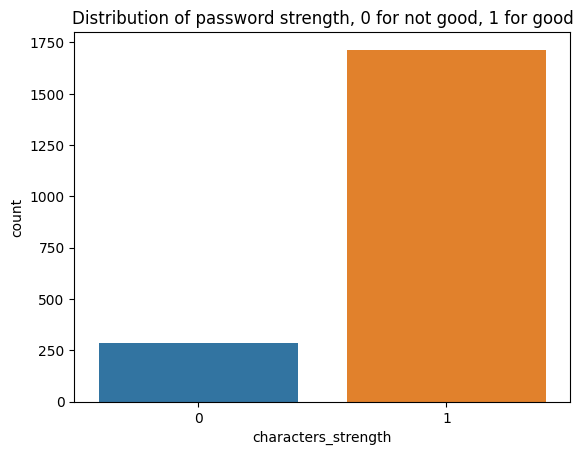

In [31]:
sns.countplot(y,data=df1)
plt.title("Distribution of password strength, 0 for not good, 1 for good")
plt.show()

In [32]:
df1.groupby(['characters_strength']).count()/len(df1)

,characters
characters_strength,
0,0.142071
1,0.857929


In [45]:
#Let us make a list of characters of password
def word(password):
    character=[]
    
    for i in password:
        character.append(i)
        
    return character

In [37]:
import datetime

In [43]:
#convert password into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(tokenizer=word)


In [47]:
df1['characters']

0          faisal213
1          yxelyr583
2            q0pv0fk
3           r3h5j8n2
4       papasito1991
            ...     
1994      crespo3139
1995          p4yun9
1996       vocal0619
1997       hyrary866
1998         bgrvl80
Name: characters, Length: 1999, dtype: object

In [50]:
df1['characters'] = df1['characters'].astype(str)
x = df1['characters'] 

In [51]:
x_vec = vector.fit_transform(x)

In [52]:
#dictionary
vector.vocabulary_

{'f': 35,
 'a': 30,
 'i': 38,
 's': 48,
 'l': 41,
 '2': 14,
 '1': 13,
 '3': 15,
 'y': 54,
 'x': 53,
 'e': 34,
 'r': 47,
 '5': 17,
 '8': 20,
 'q': 46,
 '0': 12,
 'p': 45,
 'v': 51,
 'k': 40,
 'h': 37,
 'j': 39,
 'n': 43,
 't': 49,
 'o': 44,
 '9': 21,
 'u': 50,
 'b': 31,
 'd': 33,
 'g': 36,
 '7': 19,
 '6': 18,
 '4': 16,
 'm': 42,
 'w': 52,
 'z': 55,
 'c': 32,
 '.': 10,
 '&': 5,
 '?': 26,
 '>': 25,
 '<': 24,
 '@': 27,
 '-': 9,
 '!': 1,
 '_': 29,
 ';': 23,
 '(': 6,
 ')': 7,
 '$': 3,
 ' ': 0,
 ':': 22,
 '"': 2,
 '~': 56,
 '+': 8,
 '^': 28,
 '/': 11,
 '±': 57,
 '%': 4}

In [53]:
#getting  tf-idf vector for first password

feature_names=vector.get_feature_names()
first_password=x_vec[0]
vec=pd.DataFrame(first_password.T.todense(),index=feature_names,columns=['tfidf'])
vec.sort_values(by=['tfidf'],ascending=False)

,tfidf
a,0.473471
f,0.455593
l,0.344255
s,0.329037
3,0.327731
i,0.291001
2,0.290399
1,0.255073
x,0.000000
m,0.000000


In [54]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_vec,y,test_size=0.2,random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [56]:
classifier=[]
classifier.append(LogisticRegression(multi_class='ovr'))
classifier.append(LogisticRegression(multi_class='multinomial',solver='newton-cg'))
classifier.append(xgb.XGBClassifier())
classifier.append(MultinomialNB())

In [57]:
#result
result=[]
for model in classifier:
    a=model.fit(x_train,y_train)
    result.append(a.score(x_test,y_test))

C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:15:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
result1=pd.DataFrame({'score':result,
                    'algorithms':['logistic_regr_ovr',
                                    'logistic_regr_mutinomial',
                                    'xgboost','naive bayes']})

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'cross-val-score')

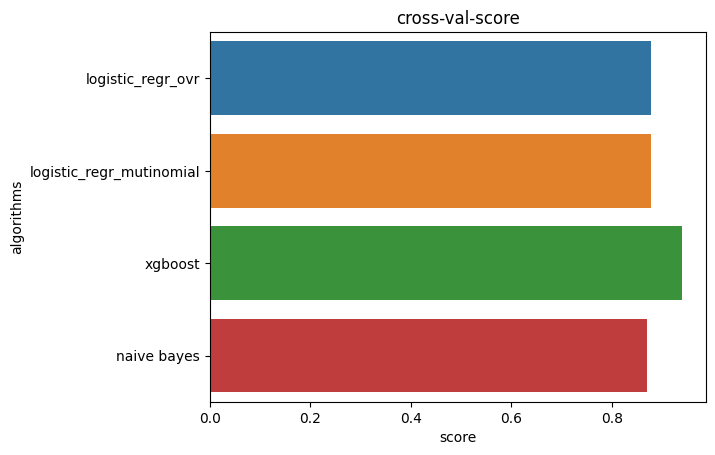

In [59]:
a=sns.barplot('score','algorithms',data=result1)
a.set_label('accuracy')
a.set_title('cross-val-score')

In [60]:
#prediction
x_pred=np.array(['123abc'])
x_pred=vector.transform(x_pred)
model=xgb.XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_pred)
y_pred

C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0], dtype=int64)